In [ ]:
import tensorflow as tf
print(tf.__version__)
# More imports
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

2.2.0


Using TensorFlow backend.


In [ ]:

df = pd.read_excel('/content/TestDataset.xlsx')
# pd.read_csv('https://raw.githubusercontent.com/IanWhittemore657/Tensorflow/master/StockPredicitions.csv')

In [ ]:
df.head()

,Insect,Date,Crop,Temperature,Number of Insects,Season,Humidity,Location,Crop Habitat,Wind,Rain,Sunlight,Infestation
0,1,2020-06-17,0,0,4,4,0,0,0,0,1,4,0
1,2,2020-06-17,1,0,6,4,0,0,0,0,1,4,0
2,3,2020-06-17,2,0,5,4,0,0,1,0,1,4,0
3,1,2020-06-18,0,0,3,4,0,0,0,0,0,6,0
4,2,2020-06-18,1,0,7,4,0,0,0,0,0,6,0


In [ ]:
df.tail()

,Insect,Date,Crop,Temperature,Number of Insects,Season,Humidity,Location,Crop Habitat,Wind,Rain,Sunlight,Infestation
589,2,2020-12-30,1,2,9,4,0,0,0,0,1,11,0
590,3,2020-12-30,2,2,9,4,0,0,1,0,1,11,0
591,1,2020-12-31,0,1,9,4,0,0,0,1,1,10,0
592,2,2020-12-31,1,1,8,4,0,0,0,1,1,10,0
593,3,2020-12-31,2,1,8,4,0,0,1,1,1,10,0


In [ ]:
input_data = df[['Number of Insects' ,'Season'	,'Humidity'	,'Location'	,'Crop Habitat'	,'Wind'	,'Rain'	,'Sunlight',]].values 
targets = df['Infestation'].values

In [ ]:
# make the actual data which will go into the neural network
T = 3 # the number of time steps to look at to make a prediction for the next day
D = input_data.shape[1]
N = len(input_data) - T # (e.g. if T=10 and you have 11 data points then you'd only have 1 sample)

In [ ]:
# normalize the inputs
Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T - 1])
input_data = scaler.transform(input_data)

In [ ]:
# Setup X_train and Y_train
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [ ]:
# Setup X_test and Y_test
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)

for u in range(N - Ntrain):
  # u counts from 0...(N - Ntrain)
  # t counts from Ntrain...N
  t = u + Ntrain
  X_test[u, :, :] = input_data[t:t+T]
  Y_test[u] = (targets[t+T] > 0)

In [ ]:
# make the RNN
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.001),
  metrics=['accuracy'],
)



In [ ]:
# train the RNN
r = model.fit(
  X_train, Y_train,
  batch_size=32,
  epochs=300,
  validation_data=(X_test, Y_test),
)

Epoch 1/300
13/13 [==============================] - 0s 32ms/step - loss: 0.6636 - accuracy: 0.6667 - val_loss: 0.6271 - val_accuracy: 0.7436
Epoch 2/300
13/13 [==============================] - 0s 6ms/step - loss: 0.5872 - accuracy: 0.8030 - val_loss: 0.5564 - val_accuracy: 0.7846
Epoch 3/300
13/13 [==============================] - 0s 5ms/step - loss: 0.5027 - accuracy: 0.8687 - val_loss: 0.4725 - val_accuracy: 0.8923
Epoch 4/300
13/13 [==============================] - 0s 5ms/step - loss: 0.4022 - accuracy: 0.9545 - val_loss: 0.3783 - val_accuracy: 0.9179
Epoch 5/300
13/13 [==============================] - 0s 5ms/step - loss: 0.3004 - accuracy: 0.9545 - val_loss: 0.2920 - val_accuracy: 0.9231
Epoch 6/300
13/13 [==============================] - 0s 6ms/step - loss: 0.2187 - accuracy: 0.9545 - val_loss: 0.2397 - val_accuracy: 0.9231
Epoch 7/300
13/13 [==============================] - 0s 13ms/step - loss: 0.1673 - accuracy: 0.9545 - val_loss: 0.2094 - val_accuracy: 0.9231
Epoch 8/300

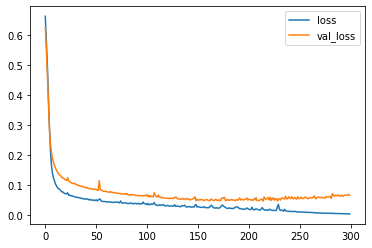

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

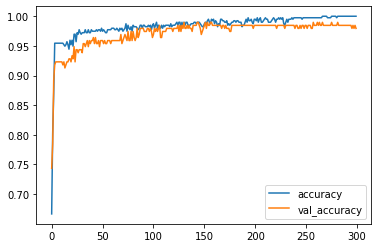

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()